# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [1]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy as np

## Evaluatoin function

Impact of the number of requests

In [2]:
# All functions in this cell are Transmission Latency (TL) and Probaility of Proving Messages Successfully (PPMS) after sending requests
def evaluation_pbft_request(num_request:int, num_nodes:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = PBFT_Simulator(num_nodes)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_qpbft_request(num_request:int, num_managing:int, num_voting:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = QPBFT_Simulator(num_managing, num_voting)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

def evaluation_proposed_scheme_request(num_request:int, num_master:int, num_slave:int,  num_random:int, num_rounds:int):
    delays = np.array([])
    probabilities = np.array([])
    consensus = Proposed_Simulator(num_master, num_slave, num_random)

    total_delay = 0
    for round in range(1, num_rounds+1):
        start = time.perf_counter()
        for request in range(1, num_request+1):
            consensus.send_request(f"Hello world {round} {request}")
        end = time.perf_counter()
        total_delay += (end - start) * 1000 # ms
        delays = np.append(delays, total_delay)
        probabilities = np.append(probabilities, consensus.success_proof / (round*request*1.0))
    
    return {
        "delays" : delays,
        "probabilities" : probabilities
    }

In [ ]:
def evaluation_pbft_num_nodes(num_requests:int, num_nodes:np.array, num_rounds:int, seed:int):
    pass
def evaluation_qpbft_num_nodes(num_requests:int, num_nodes:np.array, num_rounds:int, seed:int):
    pass
def evaluation_proposed_num_nodes(num_requests:int, num_nodes:np.array, num_rounds:int, seed:int):
    pass

In [3]:
MAX_NUM_REQUESTS = 300
num_requests = np.array([i for i in range(10, MAX_NUM_REQUESTS + 1, 10)])
MAX_NUM_NODES = 50
num_nodes = np.array([i for i in range(5, MAX_NUM_NODES + 1, 5)])

## PBFT Algorithm

In [4]:
# delays_request_pbft = np.array([])
# probability_request_pbft = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_pbft_request(num_requests[i], 10)
#     delays_request_pbft = np.append(delays_request_pbft, result[0])
#     probability_request_pbft = np.append(probability_request_pbft, result[1])

result_pbft_request = evaluation_pbft_request(10, 10, 30)

## QPBFT Algorithm

In [5]:
# delays_request_qpbft = np.array([])
# probability_request_qpbft = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_qpbft_request(num_requests[i], 6, 4)
#     delays_request_qpbft = np.append(delays_request_qpbft, result[0])
#     probability_request_qpbft = np.append(probability_request_qpbft, result[1])

result_qpbft_request = evaluation_qpbft_request(10, 6, 4, 30)

## Proposed Scheme 1
> num_random = 4

In [6]:
# delays_request_proposed = np.array([])
# probability_request_proposed = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_proposed_scheme_request(num_requests[i], 6, 4, 4)
#     delays_request_proposed = np.append(delays_request_proposed, result[0])
#     probability_request_proposed = np.append(probability_request_proposed, result[1])

result_proposed_request_1 = evaluation_proposed_scheme_request(10, 6, 4, 4, 30)

> num_random = 6

In [7]:
# delays_request_proposed2 = np.array([])
# probability_request_proposed2 = np.array([])

# for i in range(REQUESTS_LENGTH):
#     result = evaluation_proposed_scheme_request(num_requests[i], 6, 4, 6)
#     delays_request_proposed2 = np.append(delays_request_proposed2, result[0])
#     probability_request_proposed2 = np.append(probability_request_proposed2, result[1])

result_proposed_request_2 = evaluation_proposed_scheme_request(10, 6, 4, 6, 30)

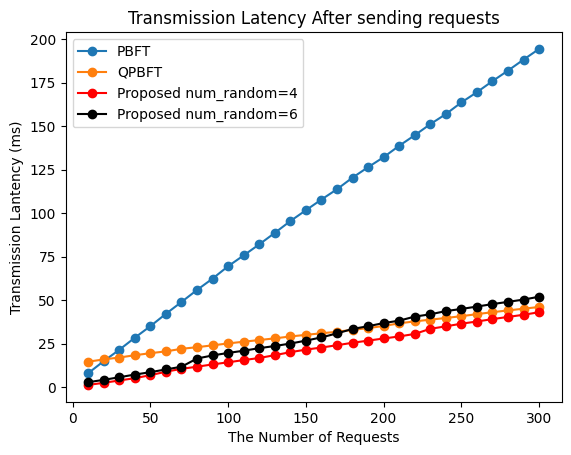

In [8]:
import matplotlib.pyplot as plot

plot.plot(num_requests, result_pbft_request["delays"], label = "PBFT", marker="o")
plot.plot(num_requests, result_qpbft_request["delays"], label = "QPBFT", marker="o")
plot.plot(num_requests, result_proposed_request_1["delays"], label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, result_proposed_request_2["delays"], label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Transmission Lantency (ms)")
plot.title("Transmission Latency After sending requests")
plot.show()

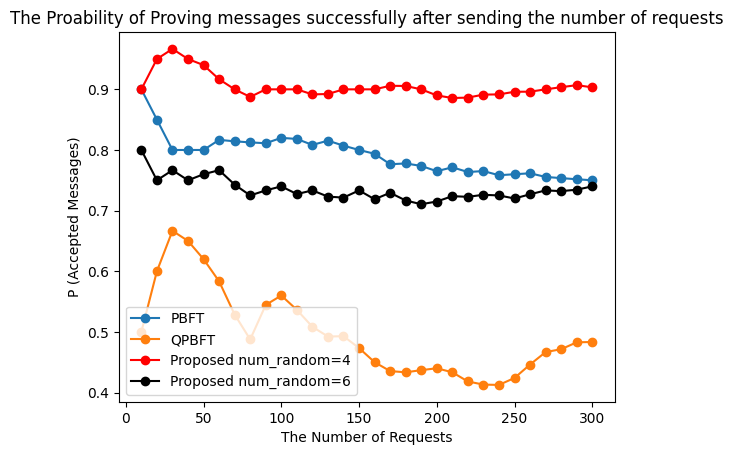

In [9]:
plot.plot(num_requests, result_pbft_request["probabilities"], label = "PBFT", marker="o")
plot.plot(num_requests, result_qpbft_request["probabilities"], label = "QPBFT", marker="o")
plot.plot(num_requests, result_proposed_request_1["probabilities"], label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, result_proposed_request_2["probabilities"], label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("P (Accepted Messages)")
plot.title("The Proability of Proving messages successfully after sending the number of requests")
plot.show()